<a href="https://colab.research.google.com/github/sanjanabayya30/Ai-ml_2303A52019/blob/main/AIML_ASS08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DECISION TREE-CLASSIFICATION

In [1]:
#1 - Imports
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fetch_openml(data_id=5).keys

<function Bunch.keys>

In [3]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2,
                        parser='auto')

In [4]:
type(car_data)

sklearn.utils._bunch.Bunch

In [5]:
car_data.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [6]:
car_data.feature_names, car_data.target.value_counts()

(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
 binaryClass
 P    1210
 N     518
 Name: count, dtype: int64)

In [7]:
# Data description

print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [8]:
# Displaying feature names

car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [9]:
# Getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [10]:
type(car_data)

pandas.core.frame.DataFrame

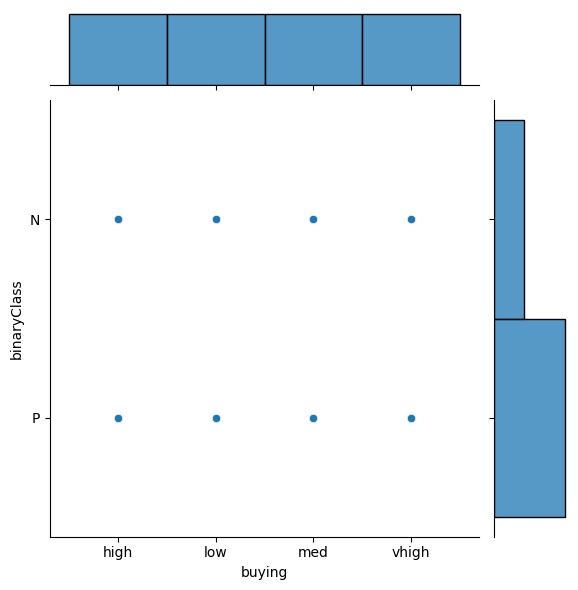

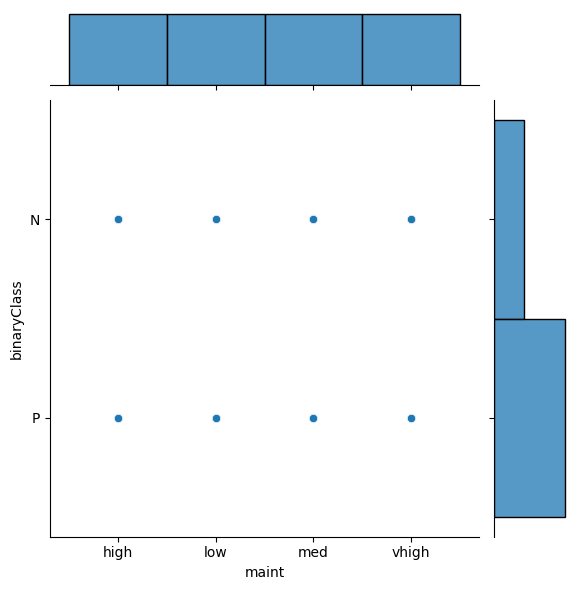

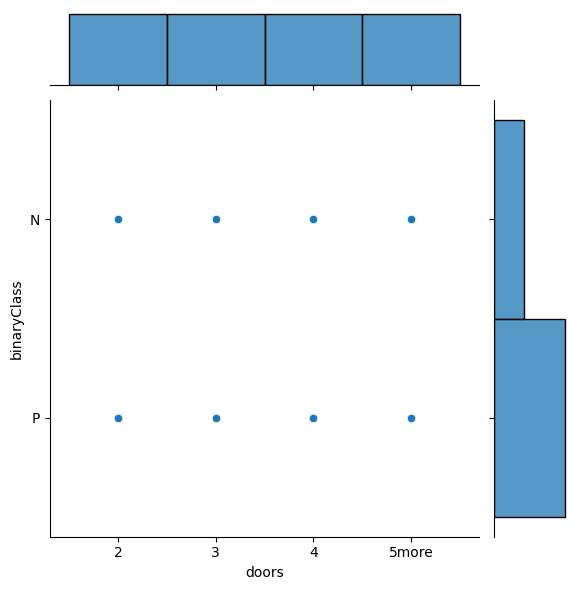

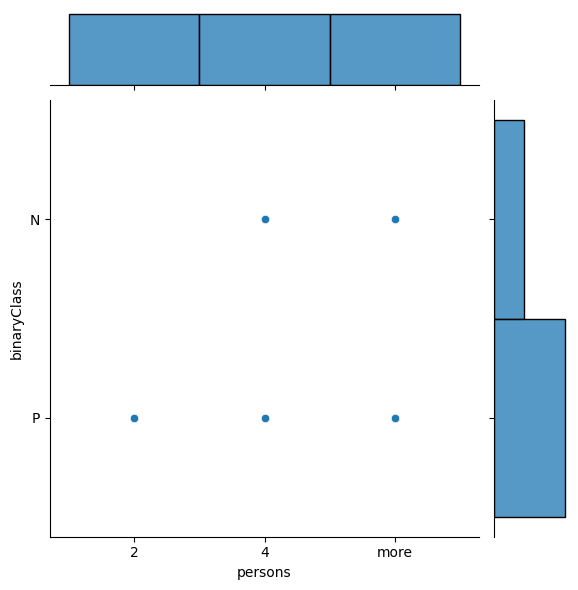

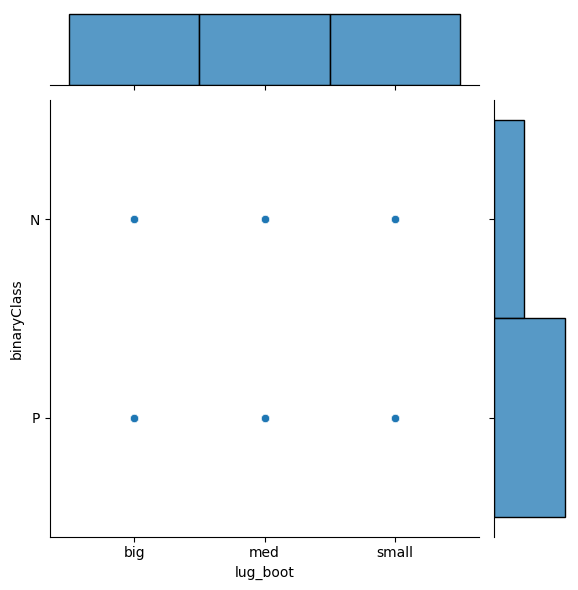

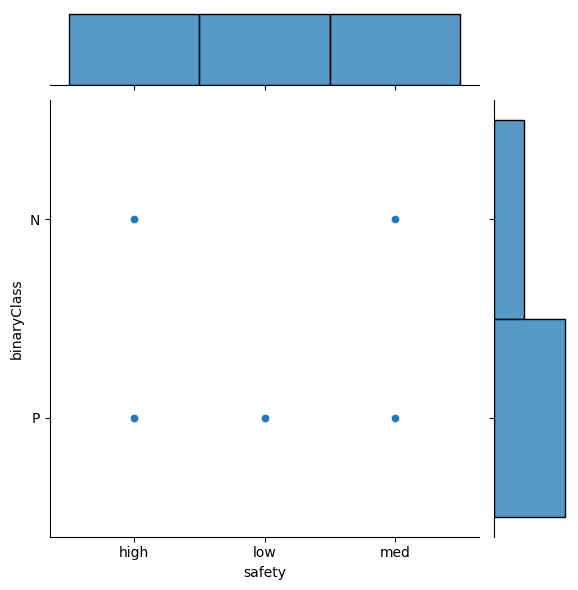

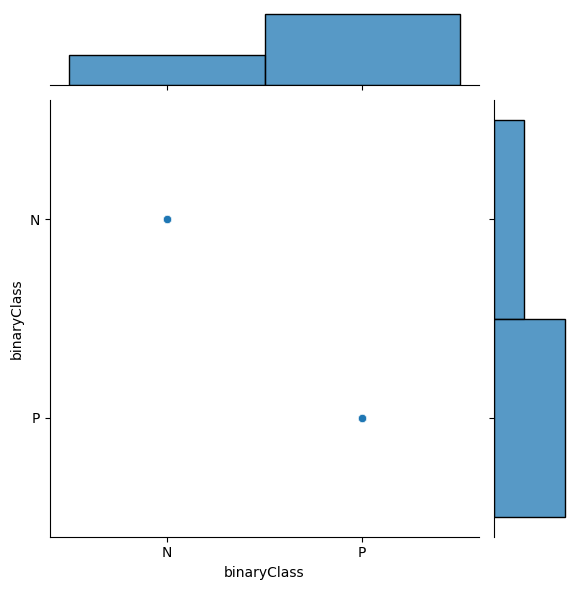

In [11]:
#Before doing exploratory analysis, let's get the training and test data.

#car_data.columns
l = len(car_data.columns)
for i in range(l):
  sns.jointplot(x=car_data.columns[i],y='binaryClass',
              data=car_data,palette='rainbow')

In [12]:
#Splitting Data into Training and Test sets
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.2,
                                         random_state=220)

#print('Dataset size:{}\ntraining data is: {}\n
#testing data is: {}'.format(len(car_data),
#                            len(train_data),len(test_data)))
car_data.shape, train_data.shape, test_data.shape

((1728, 7), (1382, 7), (346, 7))

In [13]:
#Checking Summary Statistics
# Checking summary statistics

train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1382,1382,1382,1382,1382,1382,1382
unique,4,4,4,3,3,3,2
top,vhigh,med,2,2,small,high,P
freq,356,355,352,476,478,468,972


In [14]:
#Checking Missing Values
# Checking missing values
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


In [15]:
#Checking Categorical Features
#Let's inspect some categorical features that are in the
#dataset, almost all . Let's see that!

train_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

In [16]:
train_data['buying'].value_counts()

,count
buying,
vhigh,356
low,349
med,339
high,338


In [17]:
train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


In [18]:
train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


In [19]:
train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='buying', ylabel='count'>

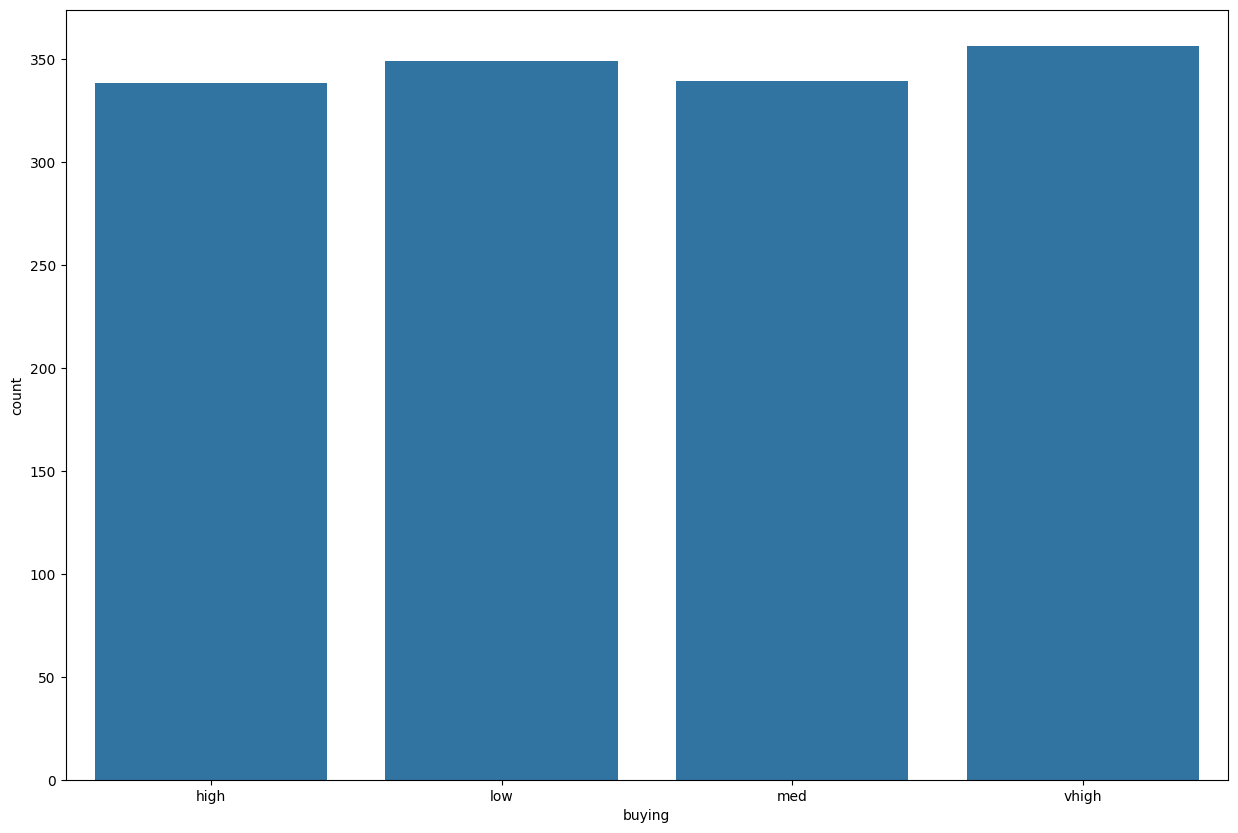

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

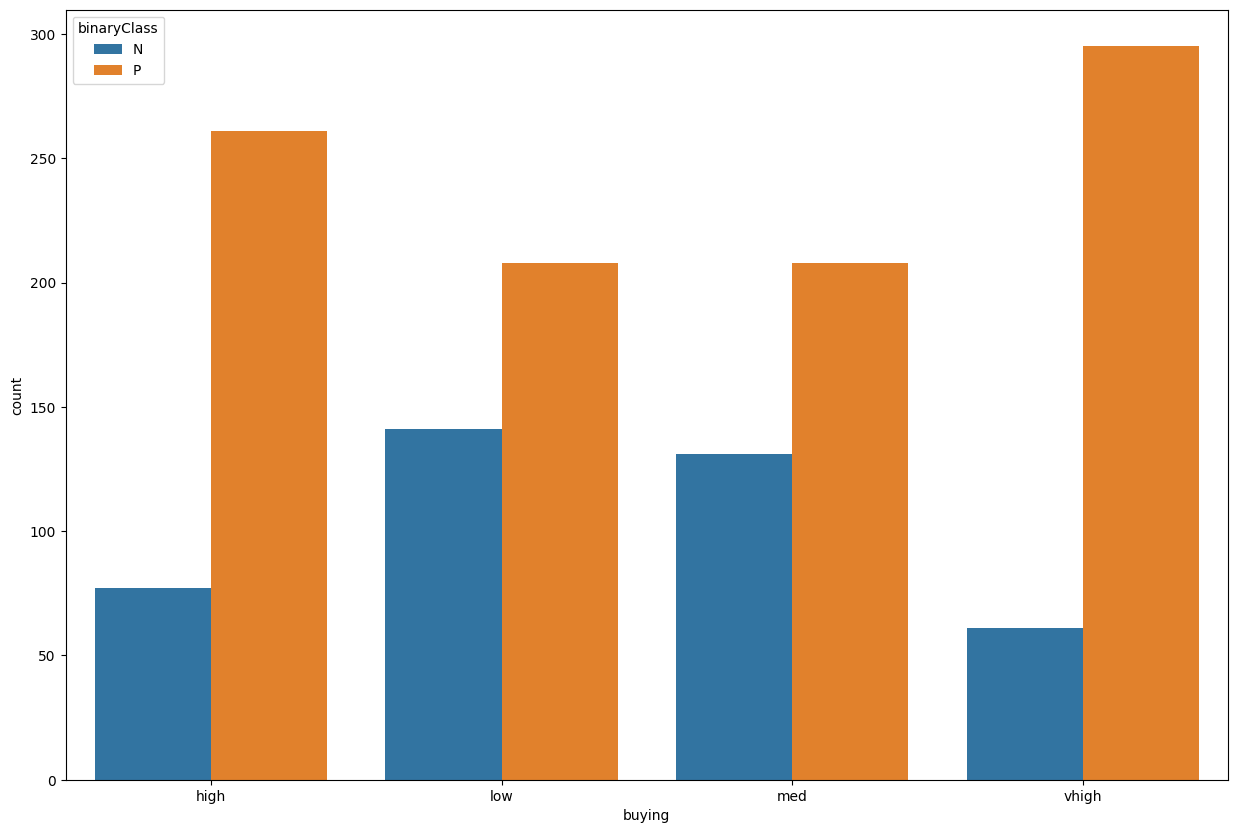

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

In [22]:
#As you can see above, the majority class in the buying price is median(med).

train_data['maint'].value_counts()

,count
maint,
med,355
vhigh,347
low,344
high,336


<Axes: xlabel='maint', ylabel='count'>

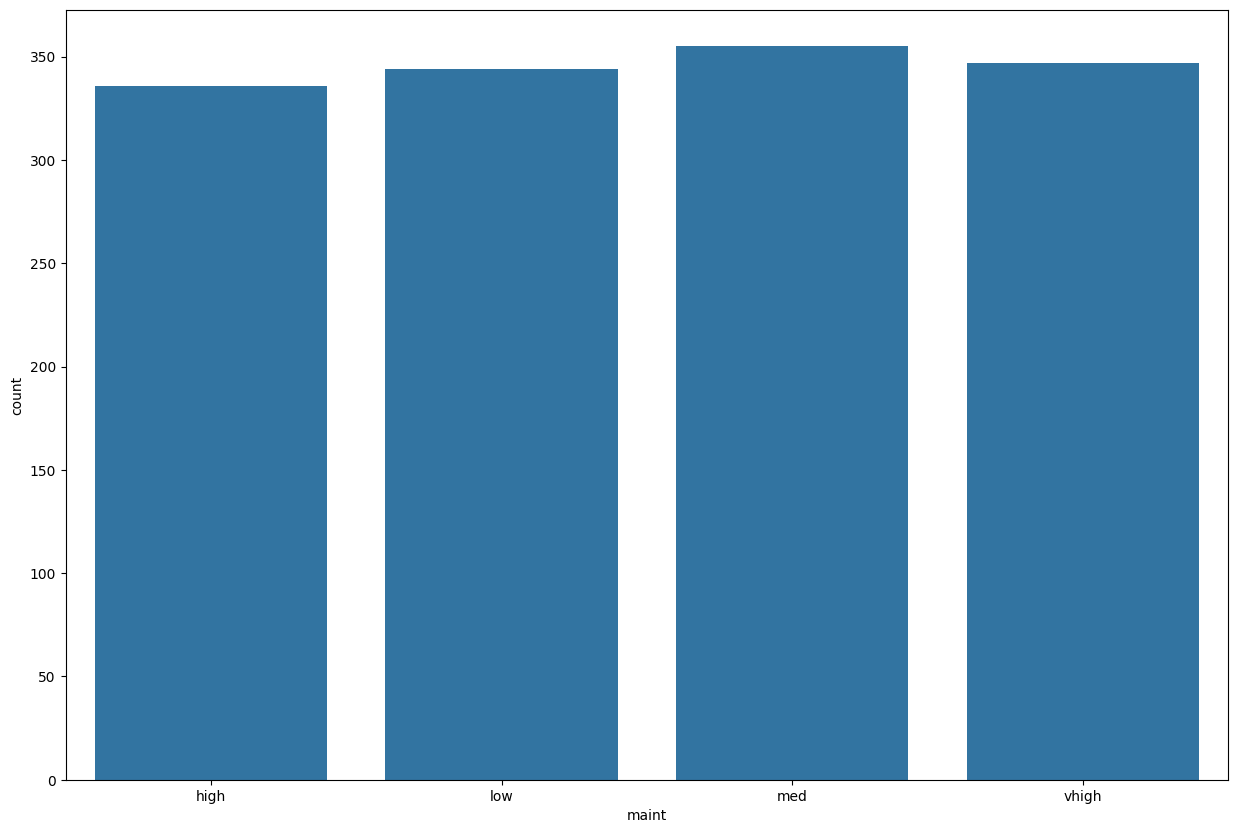

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

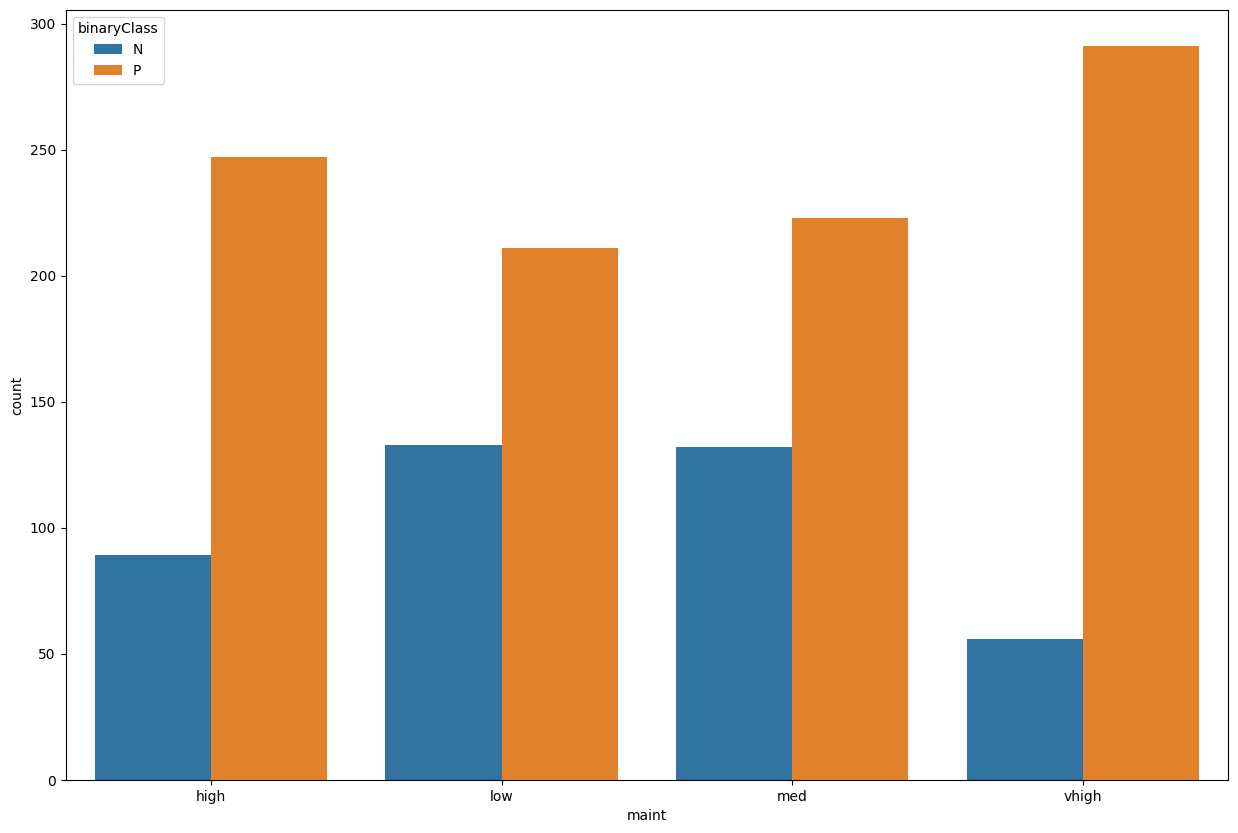

In [24]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [25]:
#Let's also check what's in doors.

train_data['doors'].value_counts()

,count
doors,
2,352
5more,347
3,342
4,341


<Axes: xlabel='doors', ylabel='count'>

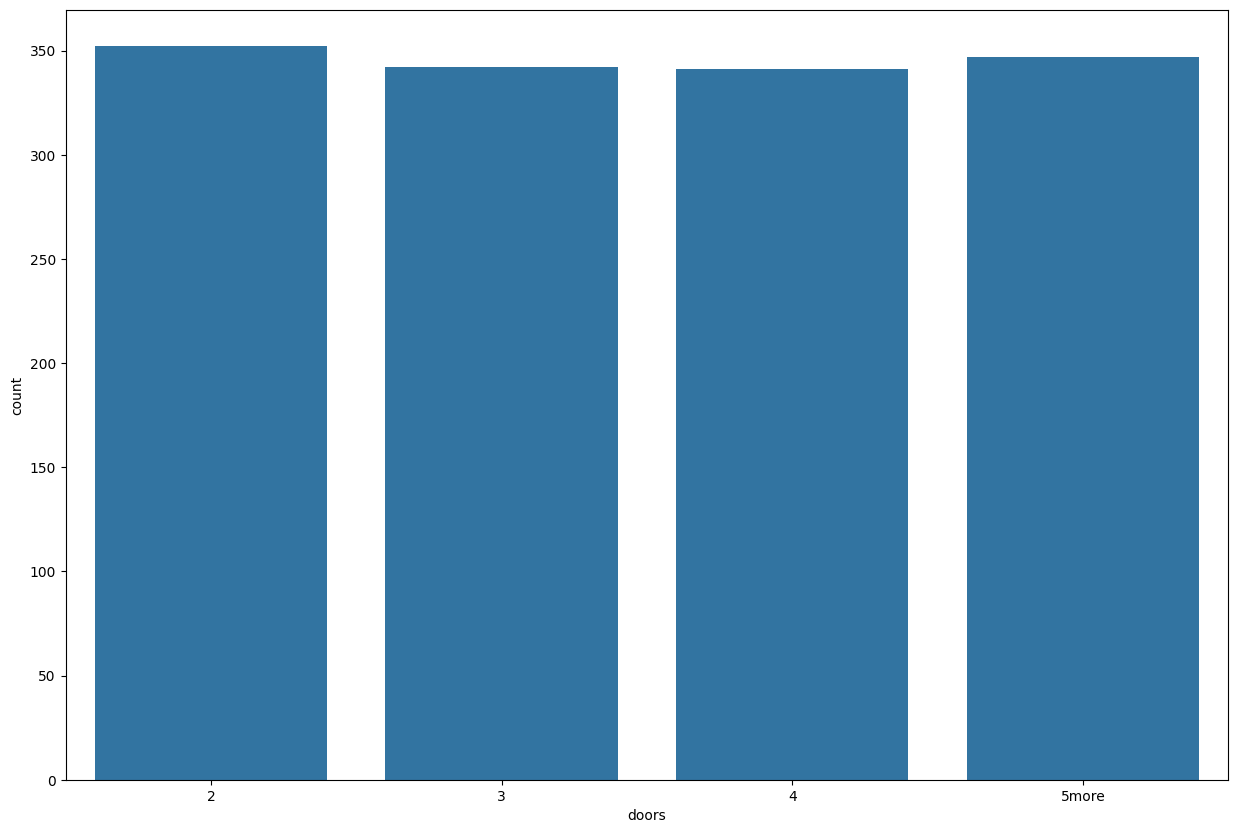

In [26]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

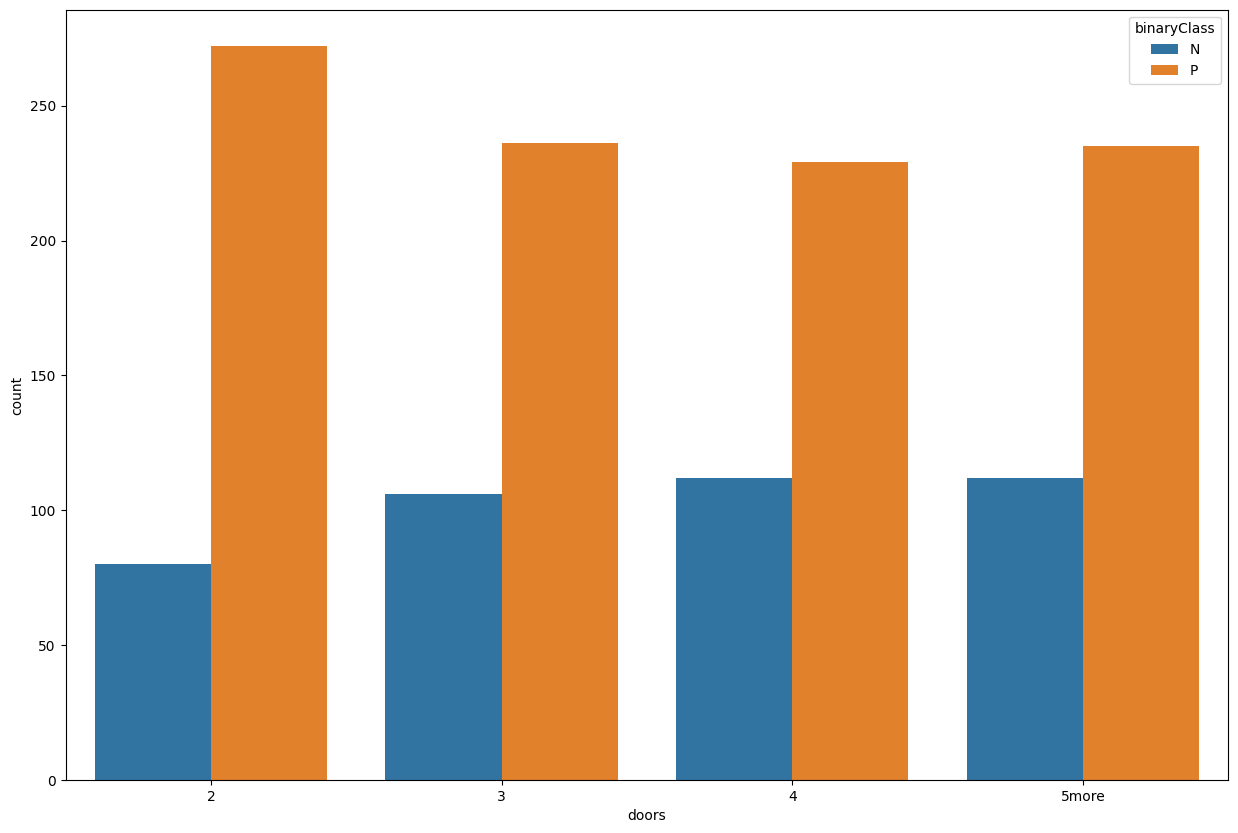

In [27]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

In [28]:
#Nothing stunning in the maintenance cost. All cars share the same maintenance costs.

train_data['persons'].value_counts()

,count
persons,
2,476
4,455
more,451


<Axes: xlabel='persons', ylabel='count'>

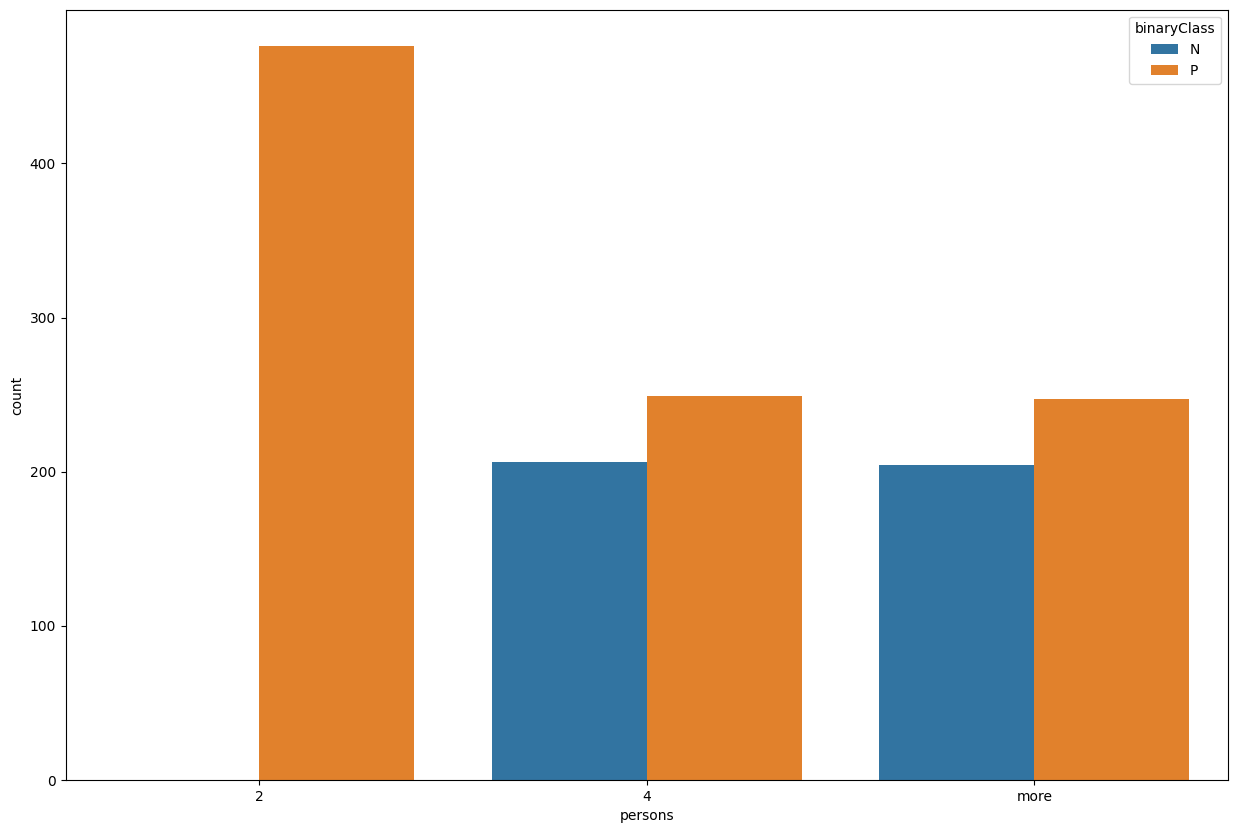

In [29]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [30]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
small,478
med,466
big,438


<Axes: xlabel='lug_boot', ylabel='count'>

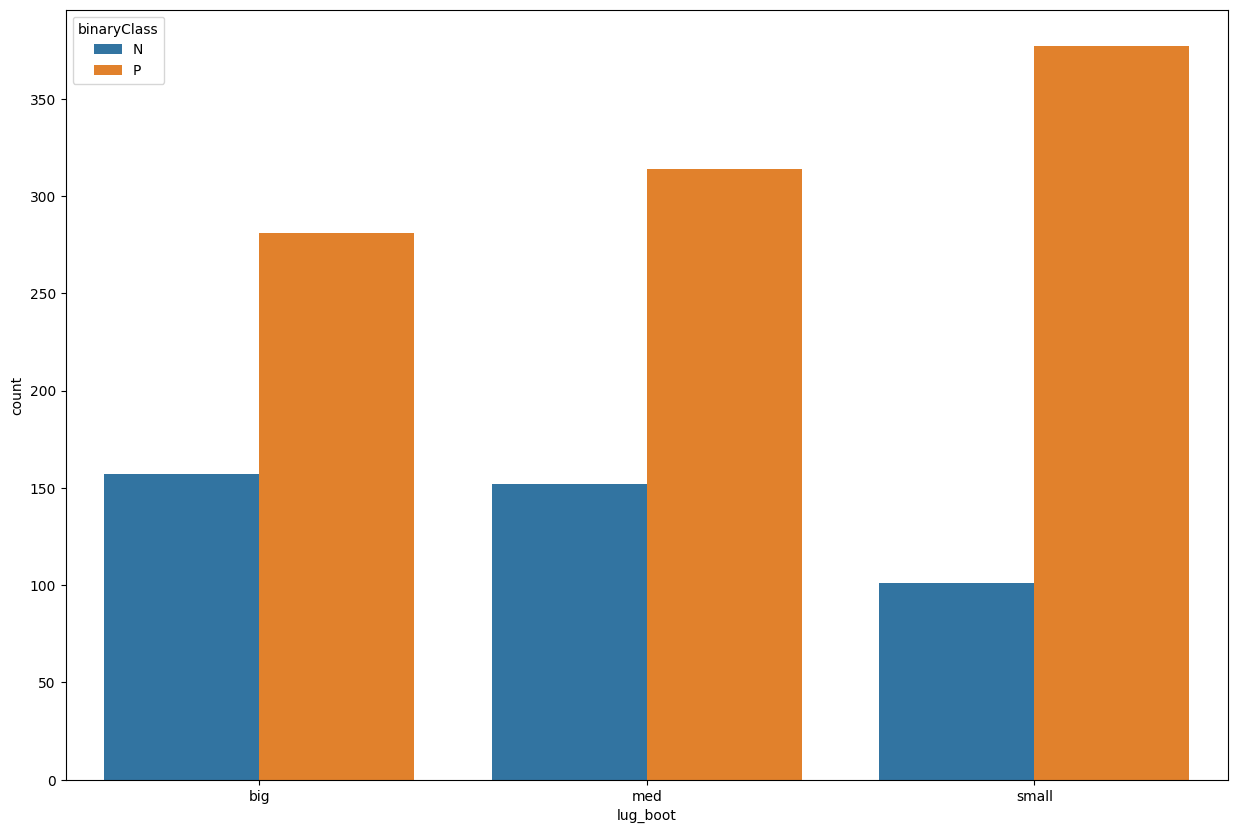

In [31]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [32]:
train_data['safety'].value_counts()

,count
safety,
high,468
med,462
low,452


<Axes: xlabel='safety', ylabel='count'>

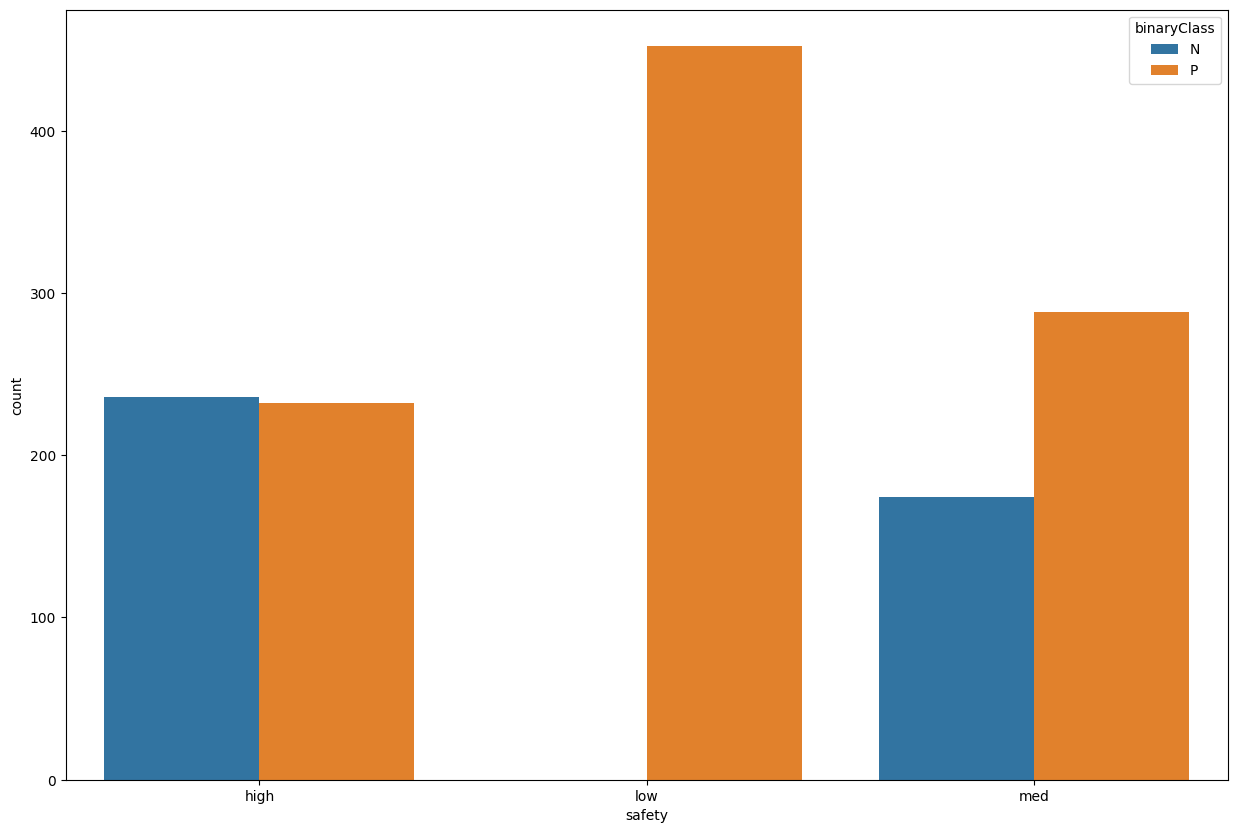

In [33]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [34]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,972
N,410


<Axes: xlabel='binaryClass', ylabel='count'>

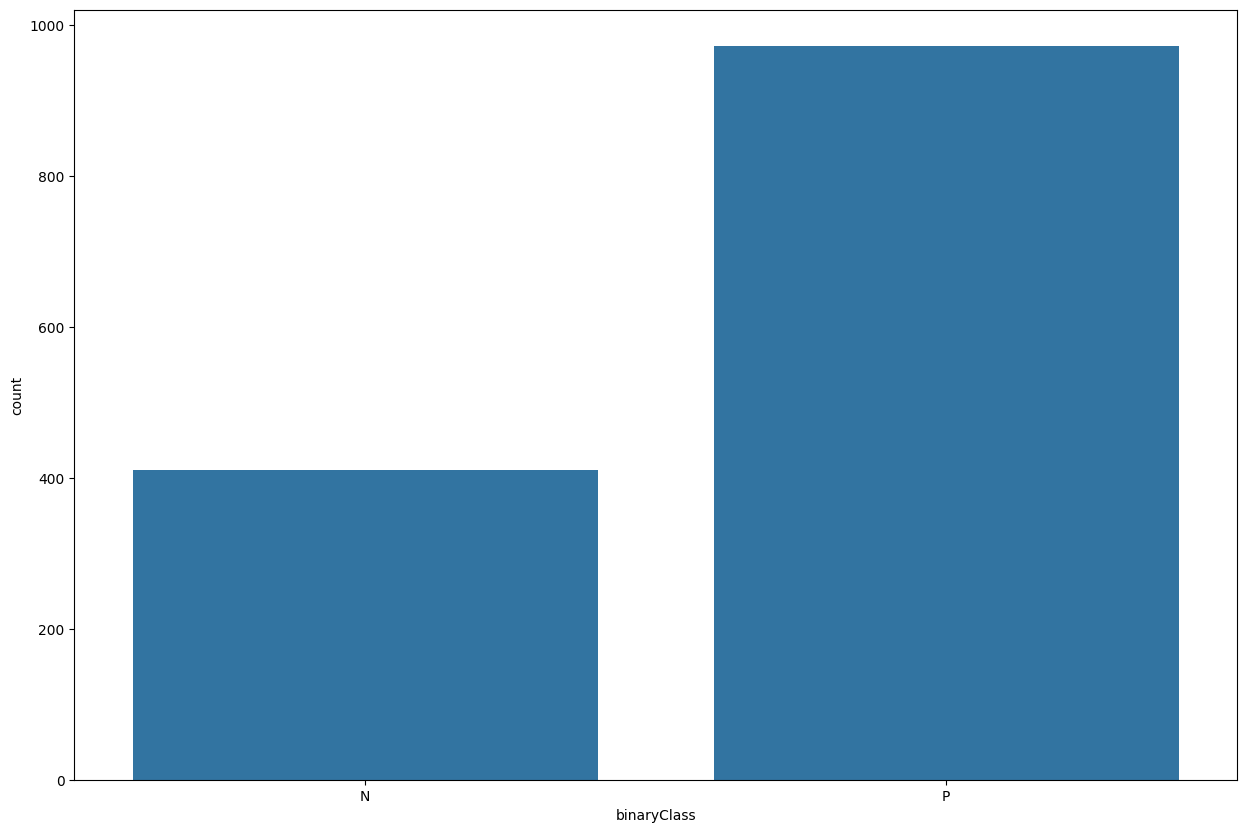

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='binaryClass')

In [36]:
#4 - Data Preprocessing
#It is here that we prepare the data to be in the proper format for the machine learning model.

#Handling Categorical Features
#Decision trees don't care if the features are scaled or not, and they can handle the categorical features. There is a note on documentation that the sklearn tree implementation doesn't support categorical features, so I will go ahead and handle them. It's fun anyways :)

#Before handling categorical features, let's create a training input data and labels.

car_train = train_data.drop('binaryClass', axis=1)
car_labels = train_data[['binaryClass']]

In [37]:
#Let's create a pipeline to encode all features in the training input data.

from sklearn.preprocessing import OrdinalEncoder

from sklearn.pipeline import Pipeline

pipe = Pipeline([('ord_enc', OrdinalEncoder())])

car_train_prepared = pipe.fit_transform(car_train)

In [38]:
#Let's also handle labels. Labels contain P and N,
#so we want to convert those into numbers. Here instead of using Ordinary Encoder,
#we will use Label Encoder. Sklearn is explicity that it is used to encode target features.

from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()

car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
car_train_prepared.shape, car_labels_prepared.shape

((1382, 6), (1382,))

In [40]:
#5 - Training Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()
tree_clf.set_params(class_weight='balanced', criterion='entropy')

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

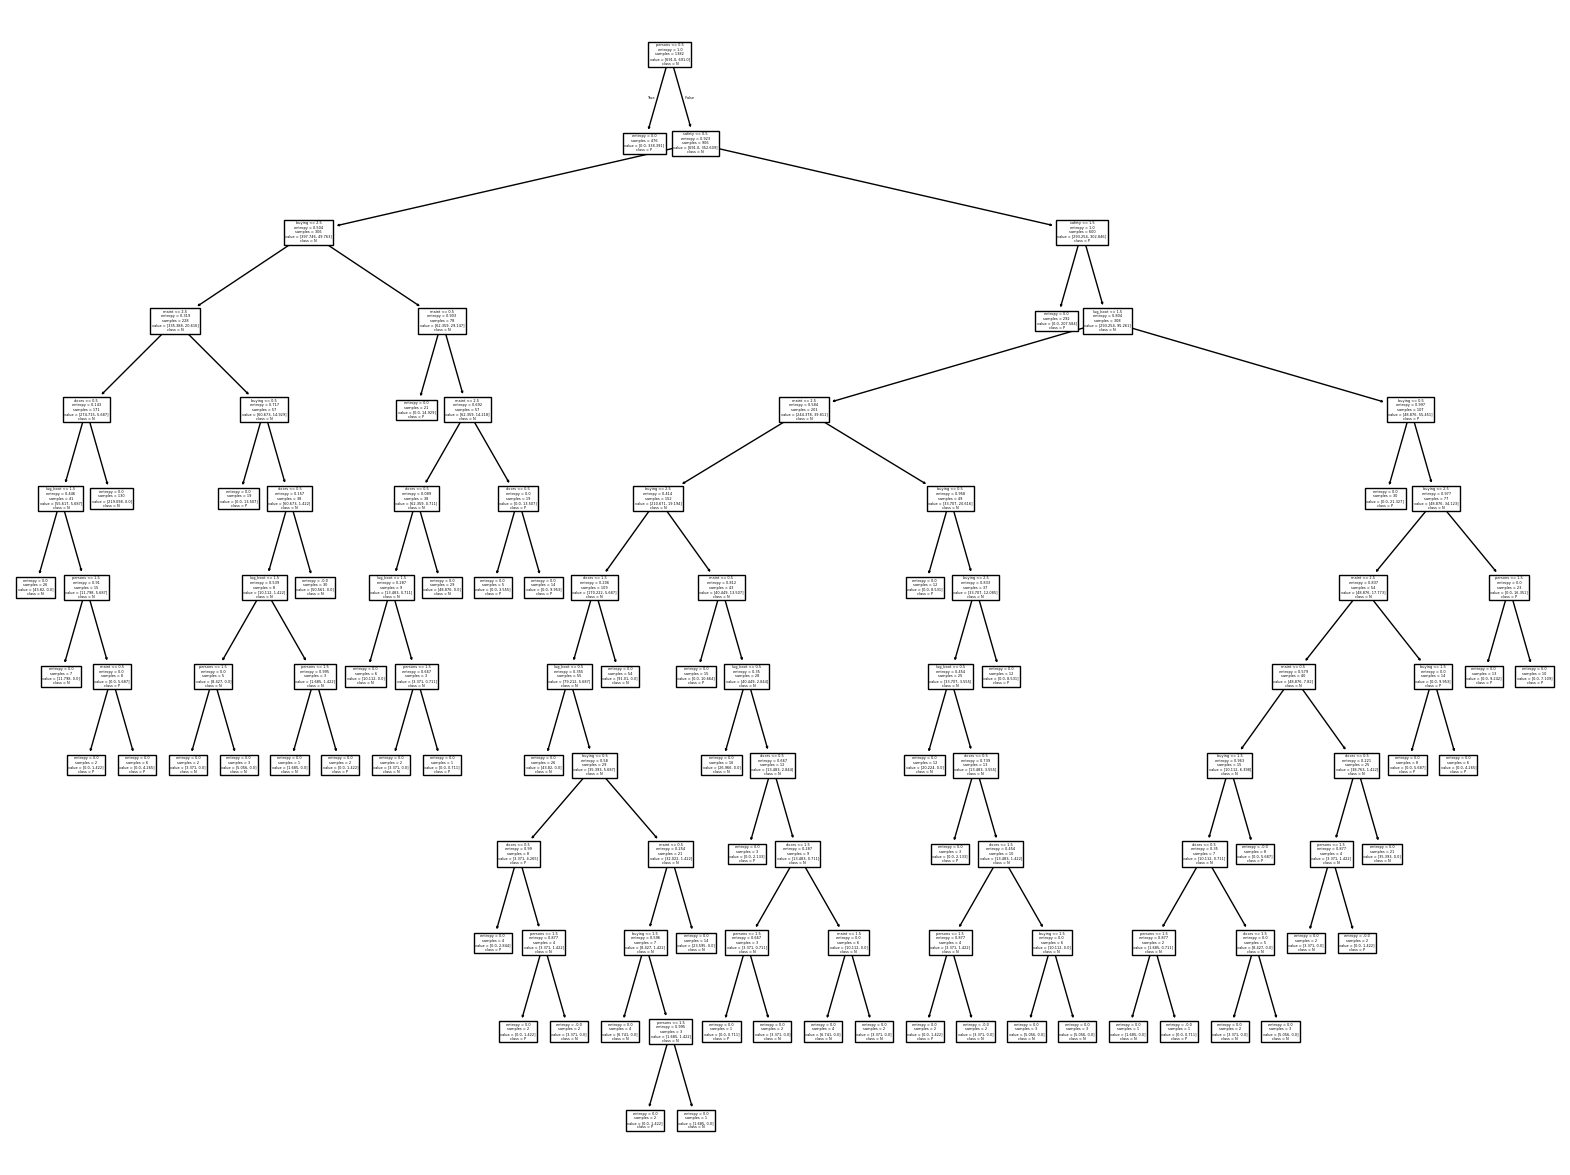

In [41]:
#In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
#On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.Let's train the same model on the scaled data.

from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_clf, feature_names=car_train.columns,
          class_names=['N','P']);

In [42]:
# if you run this, it will be error.
# SKlearn tree implementation doesn't support categorical features

#from sklearn.tree import DecisionTreeClassifier

#tree_clf = DecisionTreeClassifier()

#tree_clf.fit(car_train, car_labels)

In [44]:
#6 - Evaluating Decision Trees
#Let's build 3 functions to display accuracy, confusion matrix,and classification report. Classification report contains all useful metrics such as precision, recall, and f1 score.

from sklearn.metrics import accuracy_score, classification_report,\
confusion_matrix

preds = tree_clf.predict(car_train_prepared)
print(f"Accuracy:{accuracy_score(car_labels_prepared, preds)}")
print(f"ClassReport:{classification_report(car_labels_prepared,preds)}")
print(f"Confusion Matrix:{confusion_matrix(car_labels_prepared,preds)}")

Accuracy:1.0
ClassReport:              precision    recall  f1-score   support

           0       1.00      1.00      1.00       410
           1       1.00      1.00      1.00       972

    accuracy                           1.00      1382
   macro avg       1.00      1.00      1.00      1382
weighted avg       1.00      1.00      1.00      1382

Confusion Matrix:[[410   0]
 [  0 972]]


In [45]:
accuracy_score(car_labels_prepared,preds)

1.0

In [46]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [47]:
# Let's hide warnings returned by grid search

import warnings
warnings.filterwarnings('ignore')

In [48]:
from sklearn.model_selection import GridSearchCV

params_grid = {'max_leaf_nodes': list(range(0, 10)),
               'min_samples_split': [0,1,2, 3, 4],
               'min_samples_leaf': [0,1,2, 3, 4],
               'max_depth':[0,1,2,3,4,5],
               'max_features':[0,1,2,3,4,5],
              'max_leaf_nodes':[0,1,2,3,4,5]}

#refit is true by default. The best estimator is trained on the whole dataset

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42, class_weight='balanced'), params_grid, verbose=1, cv=3, refit=True)

grid_search.fit(car_train_prepared, car_labels_prepared)

Fitting 3 folds for each of 5400 candidates, totalling 16200 fits


GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'max_depth': [0, 1, 2, 3, 4, 5],
                         'max_features': [0, 1, 2, 3, 4, 5],
                         'max_leaf_nodes': [0, 1, 2, 3, 4, 5],
                         'min_samples_leaf': [0, 1, 2, 3, 4],
                         'min_samples_split': [0, 1, 2, 3, 4]},
             verbose=1)

In [49]:
grid_search.best_params_

{'max_depth': 4,
 'max_features': 5,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [50]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       max_leaf_nodes=5, random_state=42)

In [51]:
tree_best = grid_search.best_estimator_

In [52]:
#We can also plot the tree of the improved model.

car_data.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'binaryClass'],
      dtype='object')

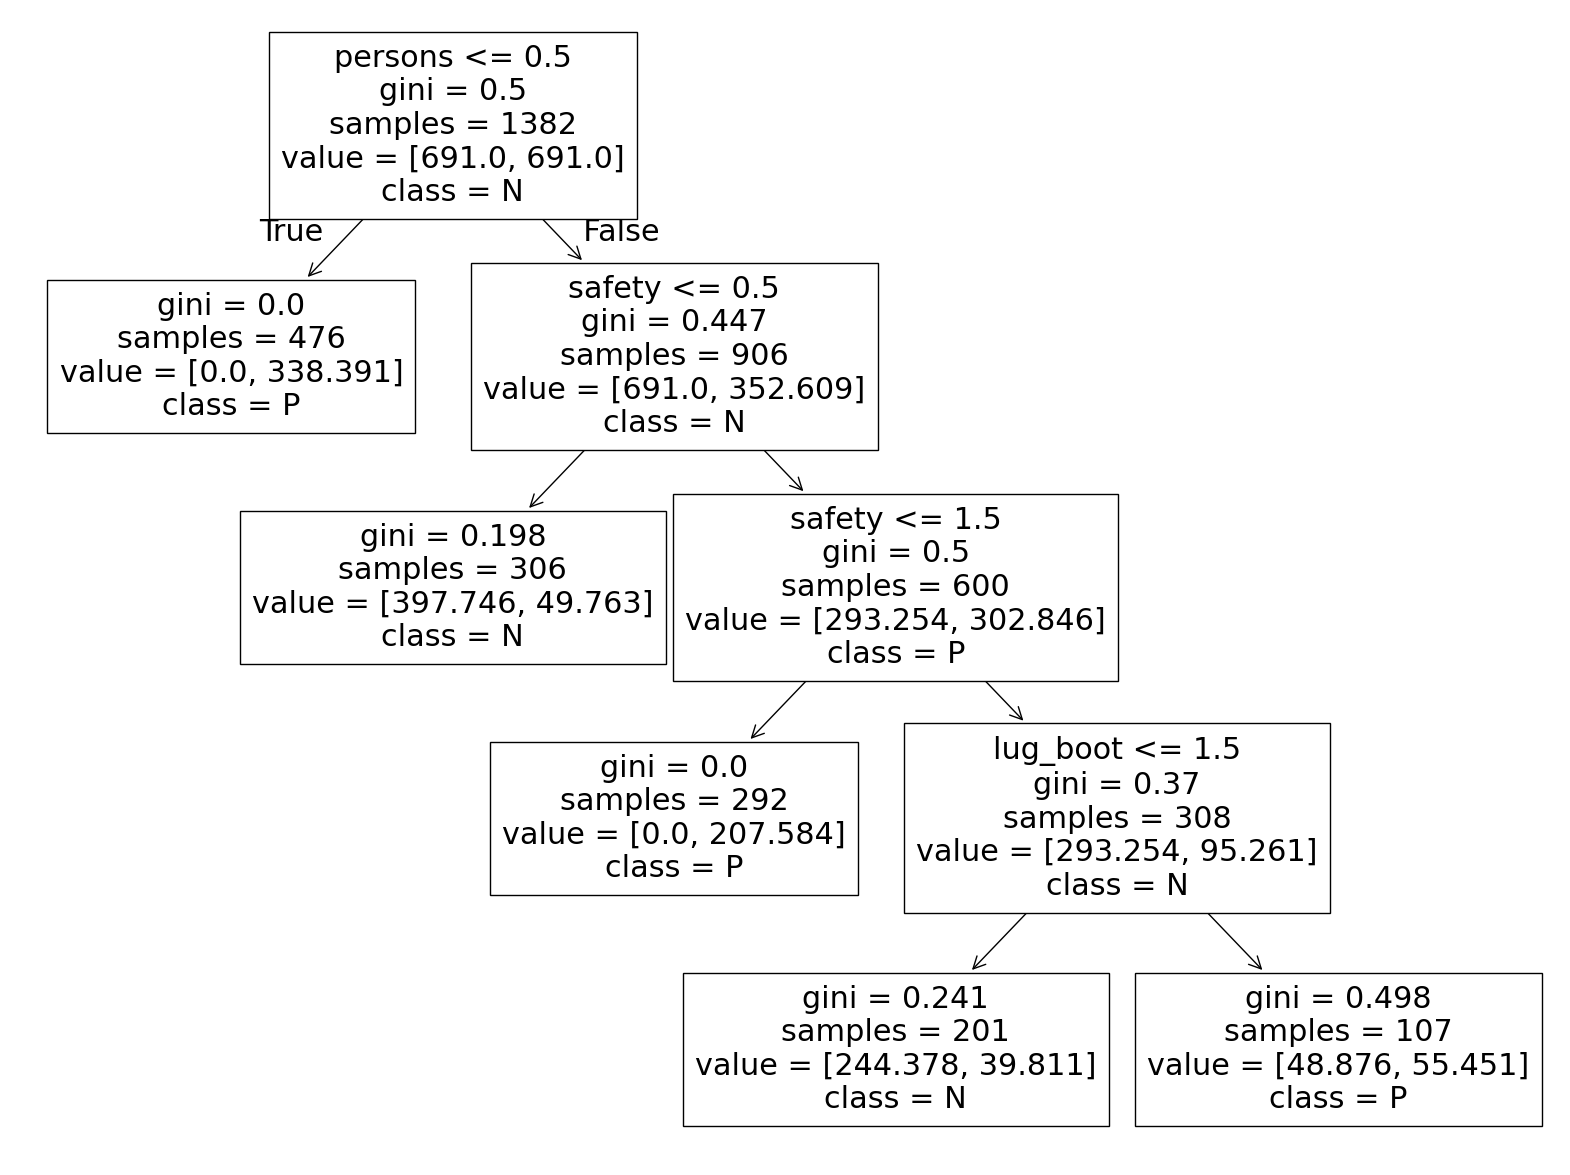

In [53]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N','P']);

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier # Assuming this is the type of tree_best


# ... other code ...


def accuracy(features, model, target):
  """Calculates the accuracy of a model's predictions.

  Args:
      features: The features to predict on.
      model: The trained model to use for predictions.
      target: The true target values.

  Returns:
      The accuracy of the model's predictions.
  """
  predictions = model.predict(features)  # Assuming 'model' has a 'predict' method
  return accuracy_score(target, predictions)

# ... other code ...

# Example of how to call it:
#Let's make prediction on the training data again.
accuracy_of_model = accuracy(car_train_prepared, tree_best, car_labels_prepared)

print(f"The accuracy of the model is: {accuracy_of_model}")

The accuracy of the model is: 0.8878437047756874


In [57]:
from sklearn.metrics import confusion_matrix

def conf_matrix(features, model, target):
    """
    Calculates and prints the confusion matrix of a model's predictions.

    Args:
        features: The features to predict on.
        model: The trained model to use for predictions.
        target: The true target values.
    """
    predictions = model.predict(features)
    cm = confusion_matrix(target, predictions)
    print("Confusion Matrix:")
    print(cm)

In [59]:
!pip install scikit-learn
from sklearn.metrics import classification_report

# Replace the line causing the error with this:
print(classification_report(car_labels_prepared, tree_best.predict(car_train_prepared)))
# Assuming tree_best is your trained model and you intend to predict on car_train_prepared

              precision    recall  f1-score   support

           0       0.75      0.93      0.83       410
           1       0.97      0.87      0.92       972

    accuracy                           0.89      1382
   macro avg       0.86      0.90      0.87      1382
weighted avg       0.90      0.89      0.89      1382



In [60]:
#Evaluating the model on the test set
#It is only after we have improved the model that we can feed it to the test set. If we try to show the test set to the model while we are still training, we may cause a potential leak thus producing misleading predictions.

#Also, we will apply the same processing functions that we applied to the training set.

car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

In [61]:
# Handling the categorical features with the pipeline that we defined early
# We don't fit on the test data. Only transform

car_test_prepared = pipe.transform(car_test)

In [62]:
# Handle labels too

car_test_labels_prepared = label_enc.transform(car_test_labels)

In [63]:
#Now we can make predictions on the test set. We will only have to call the metrics functions we created previously.

accuracy(car_test_prepared, tree_best, car_test_labels_prepared)

0.8930635838150289

In [64]:
conf_matrix(car_test_prepared, tree_best, car_test_labels_prepared)

Confusion Matrix:
[[102   6]
 [ 31 207]]


In [66]:
# Import the necessary library
from sklearn.metrics import classification_report

# Assuming your existing code is as follows:
# class_report(car_test_prepared, tree_best, car_test_labels_prepared)

# Replace it with the following:
print(classification_report(car_test_labels_prepared, tree_best.predict(car_test_prepared)))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       108
           1       0.97      0.87      0.92       238

    accuracy                           0.89       346
   macro avg       0.87      0.91      0.88       346
weighted avg       0.91      0.89      0.90       346

